In [18]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def find_DSI(paragraph: str):
    if not paragraph or len(paragraph.strip()) == 0:
        return 0.0
        
    sentences = [s.strip() for s in paragraph.split('.') if s.strip()]
    if len(sentences) <= 1:
        return 0.0
    
    try:
        model = SentenceTransformer('all-MiniLM-L6-v2')
        embeddings = model.encode(sentences)
        
        pairwise_distances = []
        for i, j in combinations(range(len(embeddings)), 2):
            similarity = cosine_similarity(
                embeddings[i].reshape(1, -1), 
                embeddings[j].reshape(1, -1)
            )[0][0]
            distance = 1 - similarity
            pairwise_distances.append(distance)
        
        if pairwise_distances:
            return np.mean(pairwise_distances)
        return 0.0
        
    except Exception as e:
        print(f"Error processing paragraph: {str(e)}")
        return 0.0

In [5]:
df = pd.read_excel("presidential_speeches_with_metadata.xlsx")

In [7]:
df

,President,Party,from,until,Vice President,title,date,info,speech
0,Donald Trump,Republican,2017,2021,1.0,"January 8, 2020: Statement on Iran",2020-01-08 00:00:00,After the killing of General Qasem Soleimani o...,As long as I am President of the United States...
1,Donald Trump,Republican,2017,2021,1.0,"January 3, 2020: Remarks on the Killing of Qas...",2020-01-03 00:00:00,President Trump announces that the US military...,"Hello, everybody. Well, thank you very much. ..."
2,Donald Trump,Republican,2017,2021,1.0,"October 27, 2019: Statement on the the Death o...",2019-10-27 00:00:00,President Donald Trump announces the death of ...,"Last night, the United States brought the worl..."
3,Donald Trump,Republican,2017,2021,1.0,"September 25, 2019: Press Conference",2019-09-25 00:00:00,President Donald Trump holds a press conferenc...,PRESIDENT TRUMP: Thank you very much. Thank...
4,Donald Trump,Republican,2017,2021,1.0,"September 24, 2019: Remarks at the United Nati...",2019-09-24 00:00:00,President Donald Trump speaks to the 74th sess...,PRESIDENT TRUMP: Thank you very much. Mr. ...
...,...,...,...,...,...,...,...,...,...
990,George Washington,Unaffiliated,1789,1797,1.0,"December 29, 1790: Talk to the Chiefs and Coun...",1790-12-29,The President reassures the Seneca Nation that...,"I the President of the United States, by my o..."
991,George Washington,Unaffiliated,1789,1797,1.0,"December 8, 1790: Second Annual Message to Con...",1790-12-08,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Re...
992,George Washington,Unaffiliated,1789,1797,1.0,"January 8, 1790: First Annual Message to Congress",1790-01-08,"In a wide-ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...
993,George Washington,Unaffiliated,1789,1797,1.0,"October 3, 1789: Thanksgiving Proclamation",1789-10-03,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...


In [8]:
df['DSI'] = df['speech'].apply(find_DSI)

In [12]:
df["year"] = pd.to_datetime(df["date"]).dt.year

In [13]:
top_50_dsi_by_president = df.groupby('President')['DSI'].mean().sort_values(ascending=False).head(50)
top_50_dsi_by_president

President
Donald Trump             0.826825
Ronald Reagan            0.816437
George H. W. Bush        0.814980
Lyndon B. Johnson        0.812547
James Monroe             0.809448
Abraham Lincoln          0.805264
Calvin Coolidge          0.804109
Bill Clinton             0.803289
Barack Obama             0.802170
Franklin D. Roosevelt    0.801105
Harry S. Truman          0.794350
James A. Garfield        0.793673
Dwight D. Eisenhower     0.792259
John F. Kennedy          0.791461
Gerald Ford              0.790823
Jimmy Carter             0.789236
William McKinley         0.789210
Benjamin Harrison        0.786541
George W. Bush           0.785248
Millard Fillmore         0.781654
Chester A. Arthur        0.781110
Herbert Hoover           0.779502
Richard M. Nixon         0.778458
Theodore Roosevelt       0.778118
John Adams               0.774570
Martin Van Buren         0.774233
Ulysses S. Grant         0.772351
James Buchanan           0.767139
Thomas Jefferson         0.763377
Wood

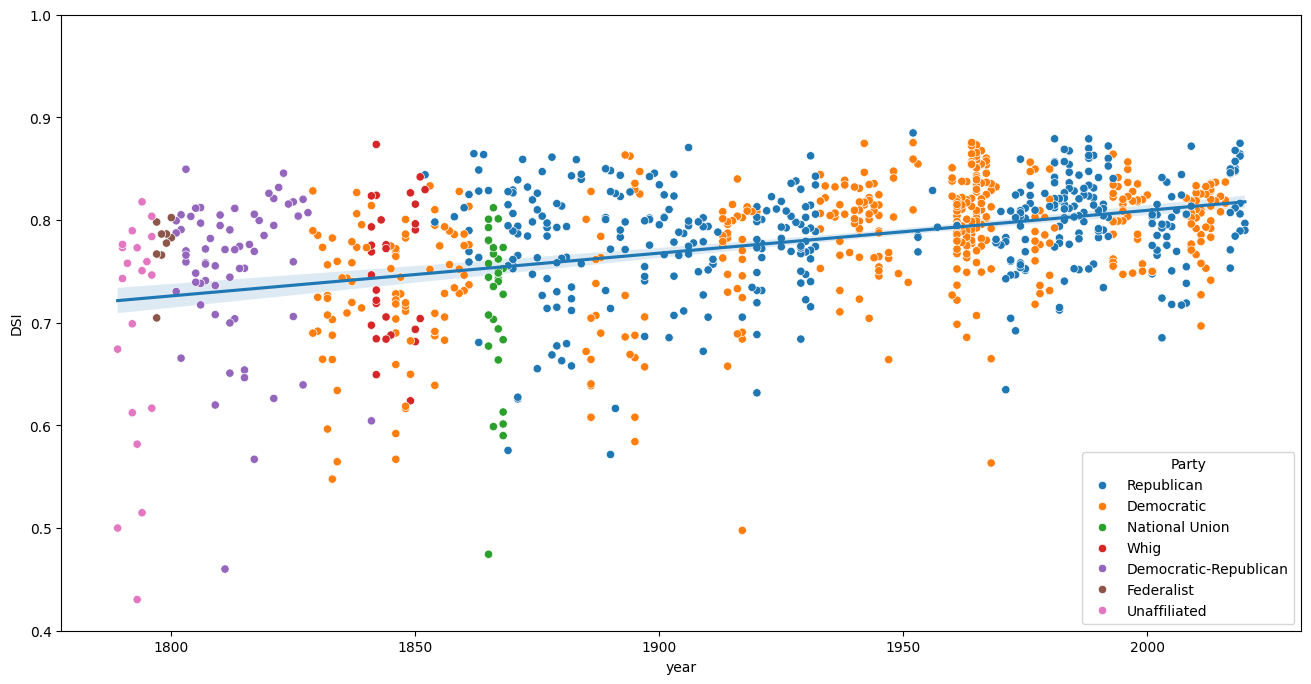

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.regplot(data=df, x='year', y='DSI', ax=ax, scatter=False)
sns.scatterplot(data=df, x='year', y='DSI', hue='Party')
plt.ylim(0.4, 1)
plt.show()